In [1]:
## Read Data

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import datetime

# Uncomment following to check python version if in doubt
# from platform import python_version
# print(python_version())

## Exploratory Data Analysis


    
# Descriptive Analysis
# deletechars = str.maketrans(dict.fromkeys(string.punctuation))

# d = file.read()
# data = d.translate(deletechars)






# Visualise

# Cleanse & Re-Visualise

# Check max and min

# Highlight features of interest

In [2]:
# Count lines of the file
try:
    file = open('Manhattan12.csv','r')
    line_count = 0
    for line in file:
        line_count += 1
        
    print('file line count:', line_count)
except FileNotFoundError:
    print('File not found.')
except:
    print('File Exception.')


file line count: 27396


In [3]:
# convert an object column with ","s to float 
# (removes commas then converts to float)
def colToFloat(data, col):
    df[col] = df[col].replace(',','', regex = True)
    print('replace ","s in file\n', df[col])#check change has been made
    df[col] = df[col].astype(float)
    return df

In [4]:
# Read file with Pandas - work with dataframe
# ensure that everything is loaded in the correct dtypes
df = pd.read_csv('Manhattan12.csv', parse_dates=['YEAR BUILT','SALE DATE'])
df = colToFloat(df,'LAND SQUARE FEET')
df = colToFloat(df,'GROSS SQUARE FEET')
df = colToFloat(df,'TOTAL UNITS')
print('file loaded')

replace ","s in file
 0            0
1            0
2            0
3            0
4            0
         ...  
27390    16217
27391     4150
27392     4150
27393      760
27394      760
Name: LAND SQUARE FEET, Length: 27395, dtype: object
replace ","s in file
 0        0
1        0
2        0
3        0
4        0
        ..
27390    0
27391    0
27392    0
27393    0
27394    0
Name: GROSS SQUARE FEET, Length: 27395, dtype: object
replace ","s in file
 0        0
1        0
2        0
3        0
4        0
        ..
27390    0
27391    0
27392    0
27393    0
27394    0
Name: TOTAL UNITS, Length: 27395, dtype: object
file loaded


In [5]:
# Data Cleaning
df = df.replace(' ', np.NaN)
df = df.replace('',np.NaN)
df['YEAR BUILT'] = df['YEAR BUILT'].replace('0', np.NaN)
del df['EASE-MENT']#because it is empty

print('some cleaning performed')

some cleaning performed


In [6]:
# Looking at Data Types
print('\n\nDataTypes:')
print(df.dtypes)



DataTypes:
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                           int64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                object
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                object
SALE DATE                         datetime64[ns]
dtype: 

In [7]:
# Looking at Null/Empty Values
sum = pd.isnull(df).sum()
print('\n\ndf isnull sum:')
print(sum)



df isnull sum:
BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT            0
ADDRESS                              0
APARTMENT NUMBER                     0
ZIP CODE                             0
RESIDENTIAL UNITS                    0
COMMERCIAL UNITS                     0
TOTAL UNITS                          0
LAND SQUARE FEET                     0
GROSS SQUARE FEET                    0
YEAR BUILT                        6441
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALE PRICE                           0
SALE DATE                            0
dtype: int64


In [8]:
# print df.shape
shape = df.shape
print ('\n\ndf shape:', shape)



df shape: (27395, 20)


In [9]:
# Looking at the Data Description - Descriptive Analysis
def describeDataFull(d):
    print('\n\nData Description:')
    description = d.describe(include='all')
    index = description.index.tolist()
    index[2] = 'mode'
    index[10] = '50% (median)'
    description.index = index
    return description
def describeData(d):
    print('\n\nData Description:')
    description = d.describe()
    index = description.index.tolist()
    index[5] = '50% (median)'
    description.index = index
    return description
describeDataFull(df)



Data Description:


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,27395.0,27395,27395,27395,27395.000000,27395.000000,27395,27395,27395,27395.000000,27395,27395.000000,27395.000000,27395.000000,2.739500e+04,20954,27395.000000,27395,27395,27395
unique,NaN,40,33,9,NaN,NaN,121,13860,2994,NaN,121,NaN,NaN,NaN,NaN,134,NaN,120,5293,353
mode,NaN,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,NaN,NaN,R4,870 7 AVENUE,,NaN,0,NaN,NaN,NaN,NaN,2007,NaN,R4,$0,2012-12-17 00:00:00
freq,NaN,6264,8480,18394,NaN,NaN,8384,2087,14570,NaN,16372,NaN,NaN,NaN,NaN,2071,NaN,8480,7593,485
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-08 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-08 00:00:00
mean,1.0,NaN,NaN,NaN,1109.666728,741.789086,NaN,NaN,NaN,10028.860120,NaN,0.374995,2.289432,965.715240,9.572026e+03,NaN,2.488118,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,465.994469,819.422424,NaN,NaN,NaN,69.959378,NaN,4.599586,15.747772,3865.774395,3.908281e+04,NaN,0.891723,NaN,NaN,NaN
min,1.0,NaN,NaN,NaN,7.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,NaN,1.000000,NaN,NaN,NaN
25%,1.0,NaN,NaN,NaN,877.000000,37.000000,NaN,NaN,NaN,10016.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,NaN,2.000000,NaN,NaN,NaN


In [10]:
#drop NaN values from rows
df = df.dropna(axis=0)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
17,1,ALPHABET CITY,,4,384,1401,RK,229 EAST 2ND STREET,1A,10009,0,0,1.0,0.0,0.0,2008,4,RK,"$360,000",2013-06-13
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,C0,243 EAST 7TH STREET,,10009,3,0,3.0,2381.0,3084.0,1899,1,C0,"$3,150,000",2013-06-03
19,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,R6,238 EAST 4TH STREET,-,10009,1,0,1.0,0.0,0.0,1955,1,R6,"$3,450,000",2013-03-27
20,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,C7,303 EAST 4TH STREET,,10009,8,2,10.0,1501.0,6929.0,1900,2,C7,$0,2013-05-02
21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,C4,715 EAST 5TH STREET,,10009,20,0,20.0,2426.0,9345.0,1900,2,C4,"$3,650,000",2012-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1228,RG,736 WEST 187 STREET,PRK28,10033,0,0,1.0,0.0,0.0,2003,4,R5,"$17,842",2012-10-15
27380,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,0,1,1.0,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-05-30
27381,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,0,1,1.0,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-01-31
27382,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,83,G9,2420 AMSTERDAM AVENUE,,10033,0,1,1.0,15000.0,2465.0,1971,4,G9,"$12,000,000",2013-05-30


In [11]:

# prices = df.get('SALE PRICE', pd.Series(index=df.index, name='Price'))
# prices = df['SALE PRICE'].(dtype=object)
# prices = np.asarray(df['SALE PRICE'])

#CONVERT SALE PRICE TO NUMERIC INSTEAD OF OBJECT - SAVE AS "SALE_PRICE"
#To fix parsing error - ValueError: Unable to parse string "$360,000" at position 0
price_copy = df['SALE PRICE'];
print('price_copy\n',price_copy)
str_prices = price_copy.replace('[\$]','', regex=True)
print('\nremove "$"\n',str_prices)
str_prices = str_prices.replace(',','', regex = True)
print('\nremove ","\n',str_prices)
str_prices = str_prices.replace(regex=r'\b0\b', value=np.NaN)
print('\nremove "0"\n',str_prices)
num_prices = pd.to_numeric(str_prices) 
print('\nprice to numeric\n',num_prices)
df = df.assign(SALE_PRICE=num_prices)


# Create log scaled version of SALE_PRICE
ln_prices = np.log(num_prices)
df = df.assign(LN_PRICE=ln_prices)
df = df.dropna()
print('\nprice after dropna\n', df['SALE PRICE'])
df

price_copy
 17          $360,000
18        $3,150,000
19        $3,450,000
20                $0
21        $3,650,000
            ...     
27379        $17,842
27380     $6,000,000
27381     $6,000,000
27382    $12,000,000
27386     $4,917,000
Name: SALE PRICE, Length: 20954, dtype: object

remove "$"
 17          360,000
18        3,150,000
19        3,450,000
20                0
21        3,650,000
            ...    
27379        17,842
27380     6,000,000
27381     6,000,000
27382    12,000,000
27386     4,917,000
Name: SALE PRICE, Length: 20954, dtype: object

remove ","
 17         360000
18        3150000
19        3450000
20              0
21        3650000
           ...   
27379       17842
27380     6000000
27381     6000000
27382    12000000
27386     4917000
Name: SALE PRICE, Length: 20954, dtype: object

remove "0"
 17         360000
18        3150000
19        3450000
20            NaN
21        3650000
           ...   
27379       17842
27380     6000000
27381     60000

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
17,1,ALPHABET CITY,,4,384,1401,RK,229 EAST 2ND STREET,1A,10009,...,1.0,0.0,0.0,2008,4,RK,"$360,000",2013-06-13,360000.0,12.793859
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,C0,243 EAST 7TH STREET,,10009,...,3.0,2381.0,3084.0,1899,1,C0,"$3,150,000",2013-06-03,3150000.0,14.962913
19,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,R6,238 EAST 4TH STREET,-,10009,...,1.0,0.0,0.0,1955,1,R6,"$3,450,000",2013-03-27,3450000.0,15.053885
21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,C4,715 EAST 5TH STREET,,10009,...,20.0,2426.0,9345.0,1900,2,C4,"$3,650,000",2012-06-09,3650000.0,15.110238
22,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,C4,274 EAST SEVENTH STREET,,10009,...,13.0,2726.0,13002.0,1910,2,C4,"$895,250",2012-10-25,895250.0,13.704858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1228,RG,736 WEST 187 STREET,PRK28,10033,...,1.0,0.0,0.0,2003,4,R5,"$17,842",2012-10-15,17842.0,9.789311
27380,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1.0,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-05-30,6000000.0,15.607270
27381,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1.0,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-01-31,6000000.0,15.607270
27382,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,83,G9,2420 AMSTERDAM AVENUE,,10033,...,1.0,15000.0,2465.0,1971,4,G9,"$12,000,000",2013-05-30,12000000.0,16.300417


In [12]:
df.describe(include=[np.number])

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE_PRICE,LN_PRICE
count,16287.0,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,1.628700e+04,16287.000000
mean,1.0,1129.946522,526.496408,10029.459692,0.355682,2.105237,1064.964020,11203.983914,2.228771,2.788147e+06,13.492840
std,0.0,501.516405,795.431386,35.785243,2.466458,13.377270,4030.055645,38744.622057,0.680224,2.095445e+07,1.721162
min,1.0,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000
25%,1.0,842.000000,24.000000,10014.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.230000e+05,12.955127
50%,1.0,1158.000000,46.000000,10021.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.700000e+05,13.554146
75%,1.0,1450.000000,1085.000000,10028.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.675000e+06,14.331324
max,1.0,2250.000000,9008.000000,10463.000000,150.000000,904.000000,213650.000000,940000.000000,4.000000,1.307965e+09,20.991738


In [13]:
# Looking at data
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
17,1,ALPHABET CITY,,4,384,1401,RK,229 EAST 2ND STREET,1A,10009,...,1.0,0.0,0.0,2008,4,RK,"$360,000",2013-06-13,360000.0,12.793859
18,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,66,C0,243 EAST 7TH STREET,,10009,...,3.0,2381.0,3084.0,1899,1,C0,"$3,150,000",2013-06-03,3150000.0,14.962913
19,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,R6,238 EAST 4TH STREET,-,10009,...,1.0,0.0,0.0,1955,1,R6,"$3,450,000",2013-03-27,3450000.0,15.053885
21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,C4,715 EAST 5TH STREET,,10009,...,20.0,2426.0,9345.0,1900,2,C4,"$3,650,000",2012-06-09,3650000.0,15.110238
22,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,C4,274 EAST SEVENTH STREET,,10009,...,13.0,2726.0,13002.0,1910,2,C4,"$895,250",2012-10-25,895250.0,13.704858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1228,RG,736 WEST 187 STREET,PRK28,10033,...,1.0,0.0,0.0,2003,4,R5,"$17,842",2012-10-15,17842.0,9.789311
27380,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1.0,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-05-30,6000000.0,15.607270
27381,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,77,G9,2430 AMSTERDAM AVENUE,,10033,...,1.0,17925.0,5226.0,1935,4,G9,"$6,000,000",2013-01-31,6000000.0,15.607270
27382,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2152,83,G9,2420 AMSTERDAM AVENUE,,10033,...,1.0,15000.0,2465.0,1971,4,G9,"$12,000,000",2013-05-30,12000000.0,16.300417


In [14]:
# Separate Data Into Training data(80%) and Testing Data(20%)
from sklearn.utils import shuffle
twenty_percent = round(16287*20/100)
print('twenty_percent=', twenty_percent,'test cells')
train_data_cells = 16287 - twenty_percent
print('train_cells= 1 to',train_data_cells)
df = shuffle(df.dropna())#must use dropna or else won't work
train_data = df[:train_data_cells]
test_data = df[train_data_cells+1:]

twenty_percent= 3257 test cells
train_cells= 1 to 13030


In [15]:
train_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE,LN_PRICE
7110,1,JAVITS CENTER,10 COOPS - ELEVATOR APARTMENTS,2,731,60,D4,"430 WEST 34TH STREET, 7D",,10001,...,0.0,0.0,0.0,1963,2,D4,"$440,000",2012-06-08,440000.0,12.994530
19571,1,UPPER EAST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1458,5,D4,"405 EAST 63RD STREET, 12N",,10065,...,0.0,0.0,0.0,1957,2,D4,"$350,000",2012-12-19,350000.0,12.765688
22265,1,UPPER EAST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1497,1090,R4,1049 FIFTH AVENUE,11B,10028,...,1.0,0.0,0.0,1928,2,R4,"$8,625,000",2013-08-07,8625000.0,15.970176
19664,1,UPPER EAST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1483,38,D4,"520 EAST 72ND STREET, 6G",,10021,...,0.0,0.0,0.0,1964,2,D4,"$299,000",2013-12-06,299000.0,12.608199
17863,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,5749,R4,333 RECTOR PLACE,1410,10280,...,1.0,0.0,0.0,1985,2,R4,"$787,117",2012-10-18,787117.0,13.576132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1550,1,D4,"301 EAST 87TH STREET, 9A",,10128,...,0.0,0.0,0.0,1973,2,D4,"$595,000",2013-02-26,595000.0,13.296317
5192,1,GREENWICH VILLAGE-WEST,10 COOPS - ELEVATOR APARTMENTS,2,609,1,D4,"175 WEST 13TH STREET, 3D",,10011,...,0.0,0.0,0.0,1961,2,D4,"$1,575,000",2012-01-08,1575000.0,14.269766
21549,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1516,42,D4,"170 EAST 88TH STREET, 4C",,10128,...,0.0,0.0,0.0,1980,2,D4,"$1,045,000",2013-05-04,1045000.0,13.859527
14500,1,MIDTOWN WEST,25 LUXURY HOTELS,4,1009,37,H2,102 WEST 57TH STREET,,10019,...,2.0,7532.0,112850.0,2007,4,H2,"$49,500",2013-05-03,49500.0,10.809728


In [16]:
# describe training data
describeData(train_data)



Data Description:


,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE_PRICE,LN_PRICE
count,13030.0,13030.000000,13030.000000,13030.000000,13030.000000,13030.000000,13030.000000,13030.000000,13030.000000,1.303000e+04,13030.000000
mean,1.0,1129.847352,528.230238,10029.602456,0.366922,2.165388,1066.045127,11332.138219,2.231773,2.908962e+06,13.497583
std,0.0,500.535467,800.693977,35.998911,2.605760,14.220095,3778.654251,38794.140561,0.681659,2.244477e+07,1.714899
min,1.0,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000
25%,1.0,849.000000,24.000000,10014.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.225000e+05,12.953945
50% (median),1.0,1158.000000,46.000000,10021.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.714000e+05,13.555962
75%,1.0,1449.000000,1085.000000,10028.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.651000e+06,14.316892
max,1.0,2250.000000,8163.000000,10463.000000,150.000000,904.000000,150322.000000,865759.000000,4.000000,1.307965e+09,20.991738


In [17]:
# View Mean of training data by NEIGHBORHOOD

train_data.groupby('NEIGHBORHOOD').mean()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE_PRICE,LN_PRICE
NEIGHBORHOOD,,,,,,,,,,,
ALPHABET CITY,1.0,391.585714,207.185714,10008.900000,0.314286,3.985714,852.928571,2529.428571,2.142857,2.192825e+06,13.557411
CHELSEA,1.0,756.527434,628.605310,10009.139823,0.428319,1.465487,597.084956,3151.458407,2.106195,3.364749e+06,13.864869
CHINATOWN,1.0,222.653846,831.211538,10011.057692,2.288462,5.346154,1142.384615,7646.076923,2.711538,4.608931e+06,14.393203
CIVIC CENTER,1.0,148.128000,969.920000,10011.080000,0.136000,1.048000,126.192000,583.184000,2.128000,1.996219e+06,14.148223
CLINTON,1.0,1068.136126,679.188482,10026.476440,0.188482,2.560209,530.685864,1979.853403,2.162304,2.764110e+06,13.650373
EAST VILLAGE,1.0,451.632000,393.832000,10004.680000,0.296000,3.560000,677.952000,2197.272000,2.048000,2.664532e+06,14.042991
FASHION,1.0,819.292683,581.764228,10012.471545,1.268293,2.024390,1387.300813,13061.130081,2.544715,6.402090e+06,14.615666
FINANCIAL,1.0,49.043344,1162.009288,10016.755418,0.086687,1.089783,235.334365,4181.052632,2.055728,2.895397e+06,13.818084
FLATIRON,1.0,837.165354,671.657480,10009.440945,0.984252,1.763780,2102.224409,13847.519685,2.220472,5.167948e+06,13.983965


In [18]:
#checking for missing values
pd.isnull(train_data).values.sum()

0

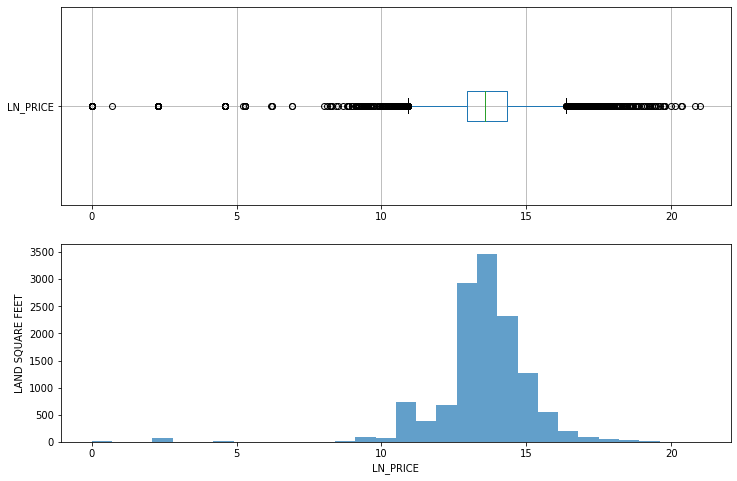

MIN <bound method Series.min of 7110     12.994530
19571    12.765688
22265    15.970176
19664    12.608199
17863    13.576132
           ...    
21885    13.296317
5192     14.269766
21549    13.859527
14500    10.809728
93       13.720100
Name: LN_PRICE, Length: 13030, dtype: float64>
MAX <bound method Series.max of 7110     12.994530
19571    12.765688
22265    15.970176
19664    12.608199
17863    13.576132
           ...    
21885    13.296317
5192     14.269766
21549    13.859527
14500    10.809728
93       13.720100
Name: LN_PRICE, Length: 13030, dtype: float64>
Q1 12.953944725779365
Q3 14.316891722902264
IQR 1.362946997122899


In [29]:

def plotstats(data, col, y_label):
#     setting size of figure
    fig = plt.figure(1)
    fig.set_size_inches(12,8)
    
#   box plot - note by default pandas boxplot whiskers are Q1 and Q3...
#   not max and min values
    plt.subplot(2,1,1)
    data.dropna().boxplot(col,vert=False)
    
    ## The historgram
    plt.subplot(2,1,2)
    temp = data[col].values
    plt.hist(temp, bins = 30, alpha = 0.7)
    plt.ylabel(y_label)
    plt.xlabel(col)
    plt.show()
    min_val = data['LN_PRICE'].min
    max_val = data['LN_PRICE'].max
    Q1 = data['LN_PRICE'].quantile(0.25)
    Q3 = data['LN_PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    print('MIN', min_val)
    print('MAX', max_val)
    print('Q1',Q1)#first whisker value
    print('Q3',Q3)#second whisker value
    print('IQR', IQR)

plotstats(train_data,'LN_PRICE', 'LAND SQUARE FEET')


# seems to give a fairly normal distribution with some outliers.

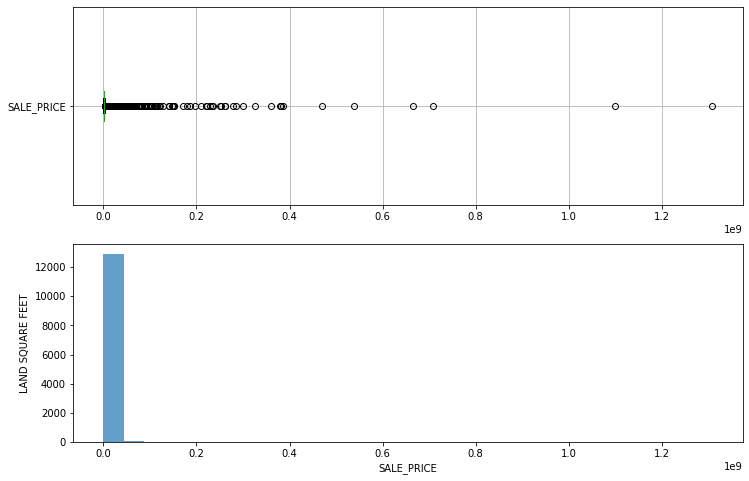

Q1 BOROUGH                           1.000000
BLOCK                           849.000000
LOT                              24.000000
ZIP CODE                      10014.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.000000
GROSS SQUARE FEET                 0.000000
TAX CLASS AT TIME OF SALE         2.000000
SALE_PRICE                   422500.000000
LN_PRICE                         12.953945
Name: 0.25, dtype: float64
Q2 BOROUGH                      1.000000e+00
BLOCK                        1.449000e+03
LOT                          1.085000e+03
ZIP CODE                     1.002800e+04
COMMERCIAL UNITS             0.000000e+00
TOTAL UNITS                  1.000000e+00
LAND SQUARE FEET             0.000000e+00
GROSS SQUARE FEET            0.000000e+00
TAX CLASS AT TIME OF SALE    2.000000e+00
SALE_PRICE                   1.651000e+06
LN_PRICE                     1.431689e+01
Name: 0.75, dtype: float64


In [20]:
# UNSCALED SALE PRICE VS LAND SQUARE FEET
plotstats(train_data,'SALE_PRICE', 'LAND SQUARE FEET')

In [28]:
# Cleanse & Re-Visualise

# Identify and Remove Outliers
def id_outliers(data):
    temp = np.zeros(data.shape[0])
    
    for i, x in enumerate(data['LN_PRICE']):
        if (x < Q1 - (IQR*1.5) or x > Q3 + (IQR*1.5) ): temp[i] = 1
    data['outlier'] = temp
    return data

def remove_outliers(data):
    data = id_outliers(data)
    data = data[data.outliers == 0]
    data.drop('outliers',axis = 1, inplace = True)
    
    data.to_csv('cleaned_train_data.csv')
    return data

        
        
# Scale Data

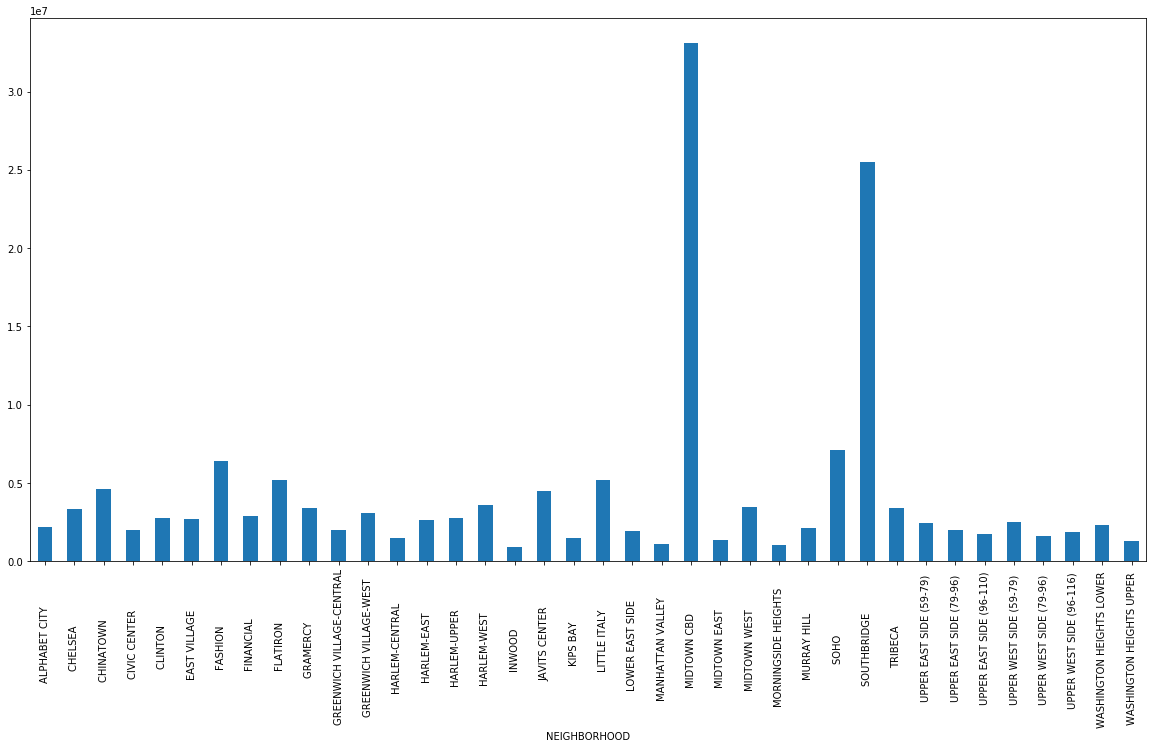

In [21]:
# Average Sale Price By Neighbourhood
fig2 = plt.figure(2, figsize = (20,10))
a = fig2.gca()
chart1 = train_data.groupby(['NEIGHBORHOOD'])['SALE_PRICE'].mean()
chart1.plot.bar(ax = a)
# train_data.plot.bar(x='NEIGHBORHOOD', y='SALE_PRICE', rot=0)
# pd.crosstab(train_data['SALE_PRICE'],train_data['NEIGHBORHOOD'], dropna='True').plot.hist(alpha=0.5, bins = 80, ax = a)
# plotstats(train_data, 'NEIGHBORHOOD','SALE_PRICE')

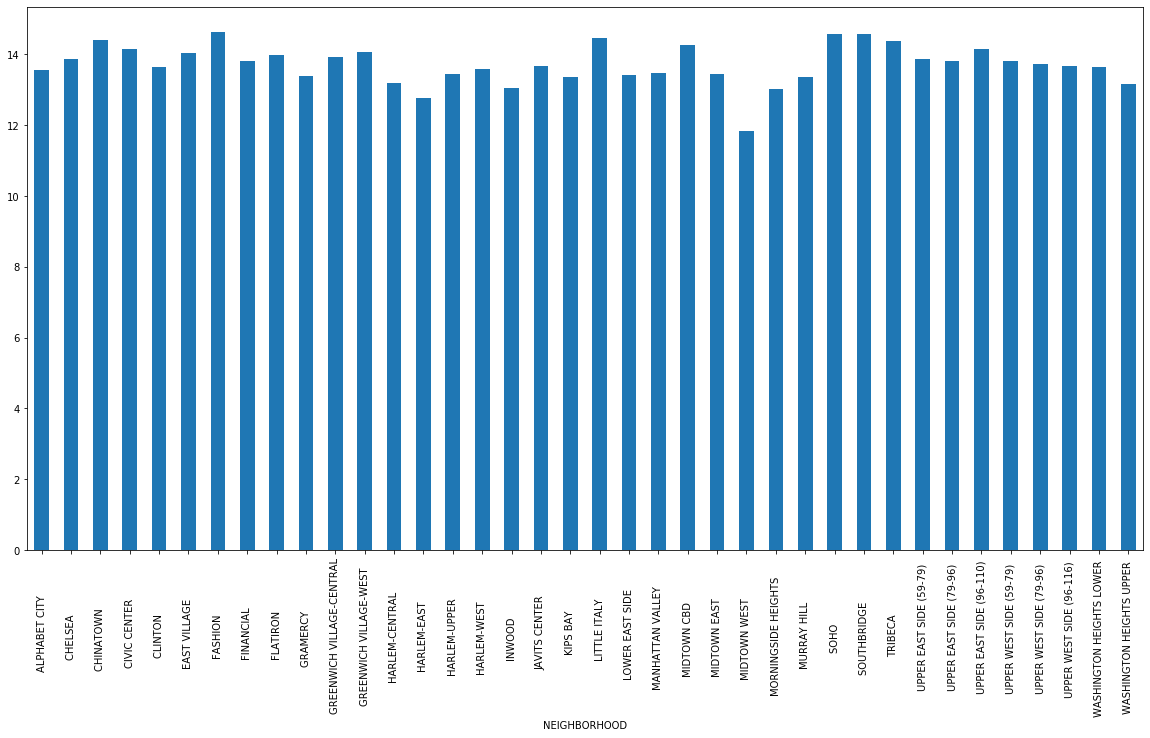

In [22]:
fig2 = plt.figure(2, figsize = (20,10))
a = fig2.gca()
chart1 = train_data.groupby(['NEIGHBORHOOD'])['LN_PRICE'].mean()
chart1.plot.bar(ax = a)

In [ ]:
# SALE PRICE dependent on BOROUGH
chart2 = train_data.groupby('BOROUGH')['SALE_PRICE'].mean()
chart2.plot.bar()
# means that all the data is from the same boughrough, this mean that price must be
# affected by town and not borouhg in this instance

In [ ]:
# SALE PRICE by building class category
fig2 = plt.figure(2, figsize = (20,10))
a = fig2.gca()
a.set_title('Sales Price vs Building Category', fontsize=20 )
a.set_ylabel('Price (e+07 scale)',fontsize=20)
a.set_xlabel('BUILDING CLASS CATEGORY',fontsize=20)
chart3 = train_data.groupby('BUILDING CLASS CATEGORY')['SALE_PRICE'].mean()
chart3.plot.bar()

In [ ]:
# Sales Price Dependent Upon Tax Class
fig2 = plt.figure(2, figsize = (20,10))
a = fig2.gca()
a.set_title('Sales Price vs Tax Class At Present', fontsize=20 )
a.set_ylabel('Price (e+07 scale)',fontsize=20)
a.set_xlabel('TAX CLASS AT PRESENT',fontsize=20)
chart3 = train_data.groupby('TAX CLASS AT PRESENT')['SALE_PRICE'].mean()
chart3.plot.bar()

In [ ]:
# Check max and min

In [ ]:
# Highlight features of interest

In [ ]:
## Model Building & Evaluating
#construct linear model

In [ ]:
## Communicate Findings on Data - Report

In [ ]:
################## Data Description Before Cleansing ###################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import datetime

# from platform import python_version
# print(python_version())

## Exploratory Data Analysis

# Load file & count line
try:
    file = open('Manhattan12.csv','r')
    line_count = 0
    for line in file:
        line_count += 1
        
    print('file line count:', line_count)
except FileNotFoundError:
    print('File not found.')
except:
    print('File Exception.')

    
# Descriptive Analysis
# deletechars = str.maketrans(dict.fromkeys(string.punctuation))

# d = file.read()
# data = d.translate(deletechars)

# Load with Pandas - work with dataframe
df = pd.read_csv('Manhattan12.csv', parse_dates=['YEAR BUILT','SALE DATE'])

print('\n\nDataTypes:')
print(df.dtypes)

df = df.replace(' ', np.NaN)
df['YEAR BUILT'] = df['YEAR BUILT'].replace('0', np.NaN)
df['EASE-MENT'] = df['YEAR BUILT'].replace('0', np.NaN)
# del df['EASE-MENT']#because it is empty

# print isnull sim
sum = pd.isnull(df).sum()
print('\n\ndf isnull sum:')
print(sum)

# print df.shape
shape = df.shape
print ('\n\ndf shape:', shape)

print('\n\nData Description:')
df.describe(include='all')


# Visualise

# Cleanse & Re-Visualise

# Check max and min

# Highlight features of interest